In [1]:
import torch
import numpy as np
import torchvision

In [2]:
cf_image = torch.load('../results/shapes_3d/closedform/latent_traversal_eps3/result_images12.pth')
cf_image_ours = torch.load('../results/shapes_3d/closedform_ours/latent_traversal_params_eps3/result_images12.pth')

In [3]:
all_images = torch.stack([cf_image[0:10],cf_image_ours[0:10],cf_image[10:20],cf_image_ours[10:20],cf_image[20:30],cf_image_ours[20:30]]).view(-1,20,3,64,64)

In [4]:
all_images.shape

torch.Size([3, 20, 3, 64, 64])

In [9]:
attr_list = ['Floor hue','Wall hue','Wall hue','Floor hue','Object hue','Object hue']
algo = ['SeFa', 'SeFa + SRE']

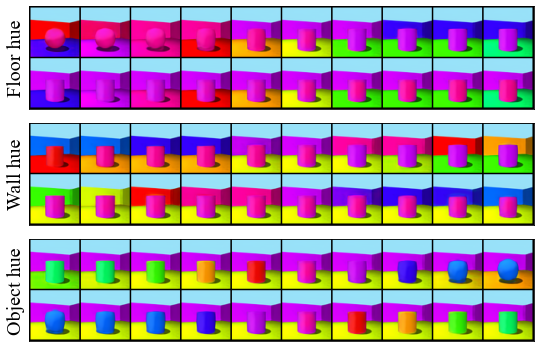

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

SMALL_SIZE = 8
plt.rc('axes', titlesize=22, labelsize=20)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["figure.facecolor"] = 'w'
plt.rcParams["font.family"] = "Times New Roman"

fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(3, 1, wspace=0.1, hspace=0.01)
ax = np.zeros(6, dtype=object)
count = 0
for i in range(3):
    for j in range(1):
        ax[count] = fig.add_subplot(gs[i, j])
        grid = torchvision.utils.make_grid(all_images[i],nrow=10, scale_each=True, normalize=True)
        ax[count].imshow(grid.permute(1, 2, 0).cpu().numpy())
        ax[count].grid(False)
        ax[count].set_xticks([])
        ax[count].set_yticks([])
        count = count + 1
#         ax[i].title.set_text(attr_list[i])
ax[0].set_ylabel(attr_list[0], rotation=90)
ax[1].set_ylabel(attr_list[2], rotation=90)
ax[2].set_ylabel(attr_list[4], rotation=90)


gs.tight_layout(fig)
plt.savefig('latent_traversal_shapes3d_main.pdf', bbox_inches = 'tight')
